In [1]:
import os
os.chdir('D:\\Gnan\\DA\\KMU\\Prediction-COVID-19')
from utils import *

In [2]:
df_variants = pd.read_csv('Data/Variants/Variants.csv')
df_variants = df_variants.fillna(0)
df_variants

,Date,Others,Omicron,Alpha,Delta,recombinant,22D,23A
0,2020-08-03,1.0,0.0,0.0,0.0,0.0,0.00,0.00
1,2020-08-04,1.0,0.0,0.0,0.0,0.0,0.00,0.00
2,2020-08-05,1.0,0.0,0.0,0.0,0.0,0.00,0.00
3,2020-08-06,1.0,0.0,0.0,0.0,0.0,0.00,0.00
4,2020-08-07,1.0,0.0,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...
1003,2023-05-03,0.0,1.0,0.0,0.0,0.0,0.19,0.64
1004,2023-05-04,0.0,1.0,0.0,0.0,0.0,0.19,0.64
1005,2023-05-05,0.0,1.0,0.0,0.0,0.0,0.19,0.64
1006,2023-05-06,0.0,1.0,0.0,0.0,0.0,0.19,0.64


In [3]:
path = 'Data/Cleaned_deathCnt/*.csv'
dic_files = Load_files.load_files(path, -14, -12)
data = dic_files['서울']
data

,deathCnt,defCnt,gubun,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,0,0,서울,Seoul,0.0,0,0,0,0,0.0,2020-01-20
1,0,0,서울,Seoul,0.0,0,0,0,0,0.0,2020-01-21
2,0,0,서울,Seoul,0.0,0,0,0,0,0.0,2020-01-22
3,0,0,서울,Seoul,0.0,0,0,0,0,0.0,2020-01-23
4,0,1,서울,Seoul,1.0,0,1,0,1,0.0,2020-01-24
...,...,...,...,...,...,...,...,...,...,...,...
1214,6471,6162486,서울,Seoul,4329.0,0,0,4371,0,65361.0,2023-05-20
1215,6473,6166682,서울,Seoul,4196.0,0,0,4195,1,65406.0,2023-05-21
1216,6476,6167953,서울,Seoul,1271.0,0,0,1271,0,65419.0,2023-05-22
1217,6477,6173315,서울,Seoul,5362.0,0,0,5359,3,65476.0,2023-05-23


In [4]:
path = 'Data/SIR_Origin/*.csv'
dic_SIRs = Load_files.load_files(path, -17, -15)
data = dic_SIRs['서울']
data

,Date,City,Susceptible,Infected,Dead,Recovered,alpha,beta,gamma
0,2020-01-20,서울,9535432,0,0,0,0.000000,0.000000,0.000000
1,2020-01-21,서울,9535432,0,0,0,0.000000,0.000000,0.000000
2,2020-01-22,서울,9535432,0,0,0,0.000000,0.000000,0.000000
3,2020-01-23,서울,9535432,0,0,0,0.000000,0.000000,0.000000
4,2020-01-24,서울,9535431,1,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1214,2023-05-20,서울,3372946,70062,6471,6085953,0.169311,0.153521,0.000029
1215,2023-05-21,서울,3368750,63500,6473,6096709,0.056656,0.025811,0.000047
1216,2023-05-22,서울,3367479,63129,6476,6098348,0.240510,0.090988,0.000016
1217,2023-05-23,서울,3362117,62746,6477,6104092,0.240104,0.089552,0.000032


In [5]:
dic_Alpha_Delta = {}
dic_omicron = {}

for city, file in dic_files.items():
    print(city)
    dic_Alpha_Delta[city] = multiple_processing_SIR(dic_SIRs, df_variants, city, file, 'Alpha', 'Delta', 126, 378, 322, 574, 14, 126)
    dic_omicron[city] = multiple_processing_SIR(dic_SIRs, df_variants, city, file, '22D', '23A', 714, -3, 910, 1201, 7, 154)
    

강원
경기
경남
경북
광주
대구
대전
부산
서울
세종
울산
인천
전남
전북
제주
충남
충북


In [7]:
for city, data in dic_Alpha_Delta.items():
    data.to_csv(f"Data/Variants/SIR/alpha_delta/{city}_alpha_delta.csv", encoding = 'cp949', index = False)
    
for city, data in dic_omicron.items():
    data.to_csv(f"Data/Variants/SIR/omicron/{city}_omicron.csv", encoding = 'cp949', index = False)

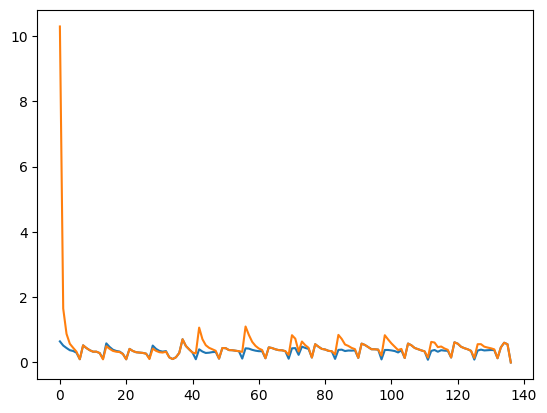

In [10]:
plt.plot(dic_omicron['서울']['22D_alpha'])
plt.plot(dic_omicron['서울']['23A_alpha'])

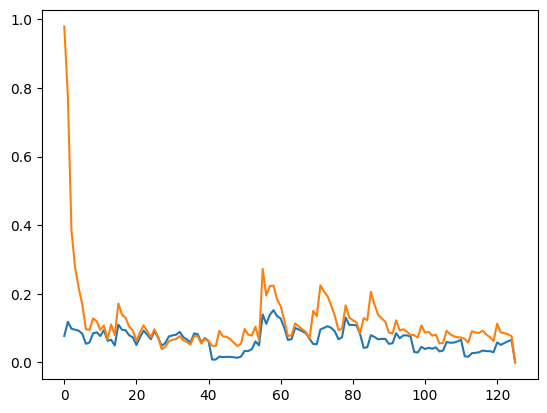

In [12]:
plt.plot(dic_Alpha_Delta['서울']['Alpha_alpha'])
plt.plot(dic_Alpha_Delta['서울']['Delta_alpha'])